# Transformer-based AI models to predict Inflation

Artifical intelligence has been the new topic of discussions across different industries. It presents many benefits. The goal of this project is to develop a Transformer based AI model that can improve the prediction of inflation as a macroeconomic indicator. This model will be compared to traditional time series models such as ARIMA, VAR, and LSTM. This is an attempt to demonstrate the efficacy of machine learning to enhance accuracy.

Data Sources:

- https://fred.stlouisfed.org/series/GDPC1
- https://fred.stlouisfed.org/series/M2V
- https://fred.stlouisfed.org/series/M2SL
- https://fred.stlouisfed.org/series/CPIAUCSL
- https://fred.stlouisfed.org/series/FEDFUNDS



## About the Data

### All the variables for this dataset were collected from Federal Reserve Economic Data at St. Louis. Except for the variables M2V and GDPC1, most of the variables are added on a monthly basis. However, the exceptions offer quaterly data points. Below are the definition of the variables:

###- **GDPC1** represents Real GDP, which is the total value of goods and services produced in an economy, adjusted for inflation using chained dollars.
###-  **M2SL** is the M2 money supply including M1 (cash + checking deposits), savings accounts, money market accounts, and small-time deposits (e.g., CDs under $100,000).
### - **M2V** represents the velocity of money which measures how frequently money is circulating in the economy. M2V specifically looks at the velocity of the M2 money supply.
### - **CPI** represents the consumer price index.
### - **FEDFUNDS** represents the federal interest rate used to determine inflation.

# Data Collection

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from statsmodels.graphics.gofplots import qqplot

from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import shapiro, boxcox
from statsmodels.stats.api import (het_breuschpagan,
                                   het_goldfeldquandt,
                                   het_white, jarque_bera,
                                   omni_normtest, normal_ad)
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant

from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from scipy.stats import boxcox
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
# Load variables
CPI_df = pd.read_excel('CPIAUCSL.xlsx') #CPI for all urban customers
FEDFUNDS_df = pd.read_excel('FEDFUNDS.xlsx')
GDP_df = pd.read_excel('GDPC1.xlsx')
M2SL_df = pd.read_excel('M2SL.xlsx')
M2V_df = pd.read_excel('M2V.xlsx')
DCOILBRENT_df = pd.read_excel('DCOILBRENTEU.xlsx')

In [ ]:
print(CPI_df)

    observation_date  CPIAUCSL
0         1947-01-01    21.480
1         1947-02-01    21.620
2         1947-03-01    22.000
3         1947-04-01    22.000
4         1947-05-01    21.950
..               ...       ...
932       2024-09-01   314.851
933       2024-10-01   315.564
934       2024-11-01   316.449
935       2024-12-01   317.603
936       2025-01-01   319.086

[937 rows x 2 columns]


In [ ]:
print(GDP_df)

    observation_date      GDPC1
0         1947-01-01   2182.681
1         1947-04-01   2176.892
2         1947-07-01   2172.432
3         1947-10-01   2206.452
4         1948-01-01   2239.682
..               ...        ...
307       2023-10-01  22960.600
308       2024-01-01  23053.545
309       2024-04-01  23223.906
310       2024-07-01  23400.294
311       2024-10-01  23536.293

[312 rows x 2 columns]


In [ ]:
print(FEDFUNDS_df)

    observation_date  FEDFUNDS
0         1954-07-01      0.80
1         1954-08-01      1.22
2         1954-09-01      1.07
3         1954-10-01      0.85
4         1954-11-01      0.83
..               ...       ...
842       2024-09-01      5.13
843       2024-10-01      4.83
844       2024-11-01      4.64
845       2024-12-01      4.48
846       2025-01-01      4.33

[847 rows x 2 columns]


In [ ]:
print(M2SL_df)

    observation_date     M2SL
0         1959-01-01    286.6
1         1959-02-01    287.7
2         1959-03-01    289.2
3         1959-04-01    290.1
4         1959-05-01    292.2
..               ...      ...
788       2024-09-01  21252.4
789       2024-10-01  21332.7
790       2024-11-01  21465.8
791       2024-12-01  21549.3
792       2025-01-01  21561.4

[793 rows x 2 columns]


In [ ]:
print(M2V_df)

    observation_date    M2V
0         1959-01-01  1.773
1         1959-04-01  1.789
2         1959-07-01  1.773
3         1959-10-01  1.779
4         1960-01-01  1.817
..               ...    ...
259       2023-10-01  1.366
260       2024-01-01  1.375
261       2024-04-01  1.381
262       2024-07-01  1.387
263       2024-10-01  1.386

[264 rows x 2 columns]


# Missing Data

In [ ]:
# check if there are any missing data
CPI_df.isnull().sum()

,0
observation_date,0
CPIAUCSL,0


In [ ]:
FEDFUNDS_df.isnull().sum()

,0
observation_date,0
FEDFUNDS,0


In [ ]:
GDP_df.isnull().sum()

,0
observation_date,0
GDPC1,0


In [ ]:
M2SL_df.isnull().sum()

,0
observation_date,0
M2SL,0


In [ ]:
M2V_df.isnull().sum()

,0
observation_date,0
M2V,0


# Merge
The Data is consistent between 1960 and 2023. Those are the dates that will be
used to predict inflation.

In [ ]:
# Outer Merge
data = pd.merge(pd.merge(pd.merge(pd.merge(CPI_df, FEDFUNDS_df, on='observation_date', how='outer'), M2SL_df, on='observation_date', how='outer'), M2V_df, on='observation_date', how='outer') , GDP_df, on='observation_date', how='outer')
data

,observation_date,CPIAUCSL,FEDFUNDS,M2SL,M2V,GDPC1
0,1947-01-01,21.480,NaN,NaN,NaN,2182.681
1,1947-02-01,21.620,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,NaN,NaN,2176.892
4,1947-05-01,21.950,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
932,2024-09-01,314.851,5.13,21252.4,NaN,NaN
933,2024-10-01,315.564,4.83,21332.7,1.386,23536.293
934,2024-11-01,316.449,4.64,21465.8,NaN,NaN
935,2024-12-01,317.603,4.48,21549.3,NaN,NaN


In [ ]:
# Determine the data Types
data.dtypes

,0
observation_date,datetime64[ns]
CPIAUCSL,float64
FEDFUNDS,float64
M2SL,float64
M2V,float64
GDPC1,float64


In [ ]:
# Convert the month column to an index
data.index = data['observation_date']
del data['observation_date']

print(data.head())

                  CPIAUCSL  FEDFUNDS  M2SL  M2V     GDPC1
observation_date                                         
1947-01-01           21.48       NaN   NaN  NaN  2182.681
1947-02-01           21.62       NaN   NaN  NaN       NaN
1947-03-01           22.00       NaN   NaN  NaN       NaN
1947-04-01           22.00       NaN   NaN  NaN  2176.892
1947-05-01           21.95       NaN   NaN  NaN       NaN


In [ ]:
# Check the index
data.index

DatetimeIndex(['1947-01-01', '1947-02-01', '1947-03-01', '1947-04-01',
               '1947-05-01', '1947-06-01', '1947-07-01', '1947-08-01',
               '1947-09-01', '1947-10-01',
               ...
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01'],
              dtype='datetime64[ns]', name='observation_date', length=937, freq=None)

In [ ]:
# Change the index frequency to MS
data.index.freq = 'MS'
data.index

DatetimeIndex(['1947-01-01', '1947-02-01', '1947-03-01', '1947-04-01',
               '1947-05-01', '1947-06-01', '1947-07-01', '1947-08-01',
               '1947-09-01', '1947-10-01',
               ...
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01'],
              dtype='datetime64[ns]', name='observation_date', length=937, freq='MS')

Text(0.5, 1.0, 'GDPC1')

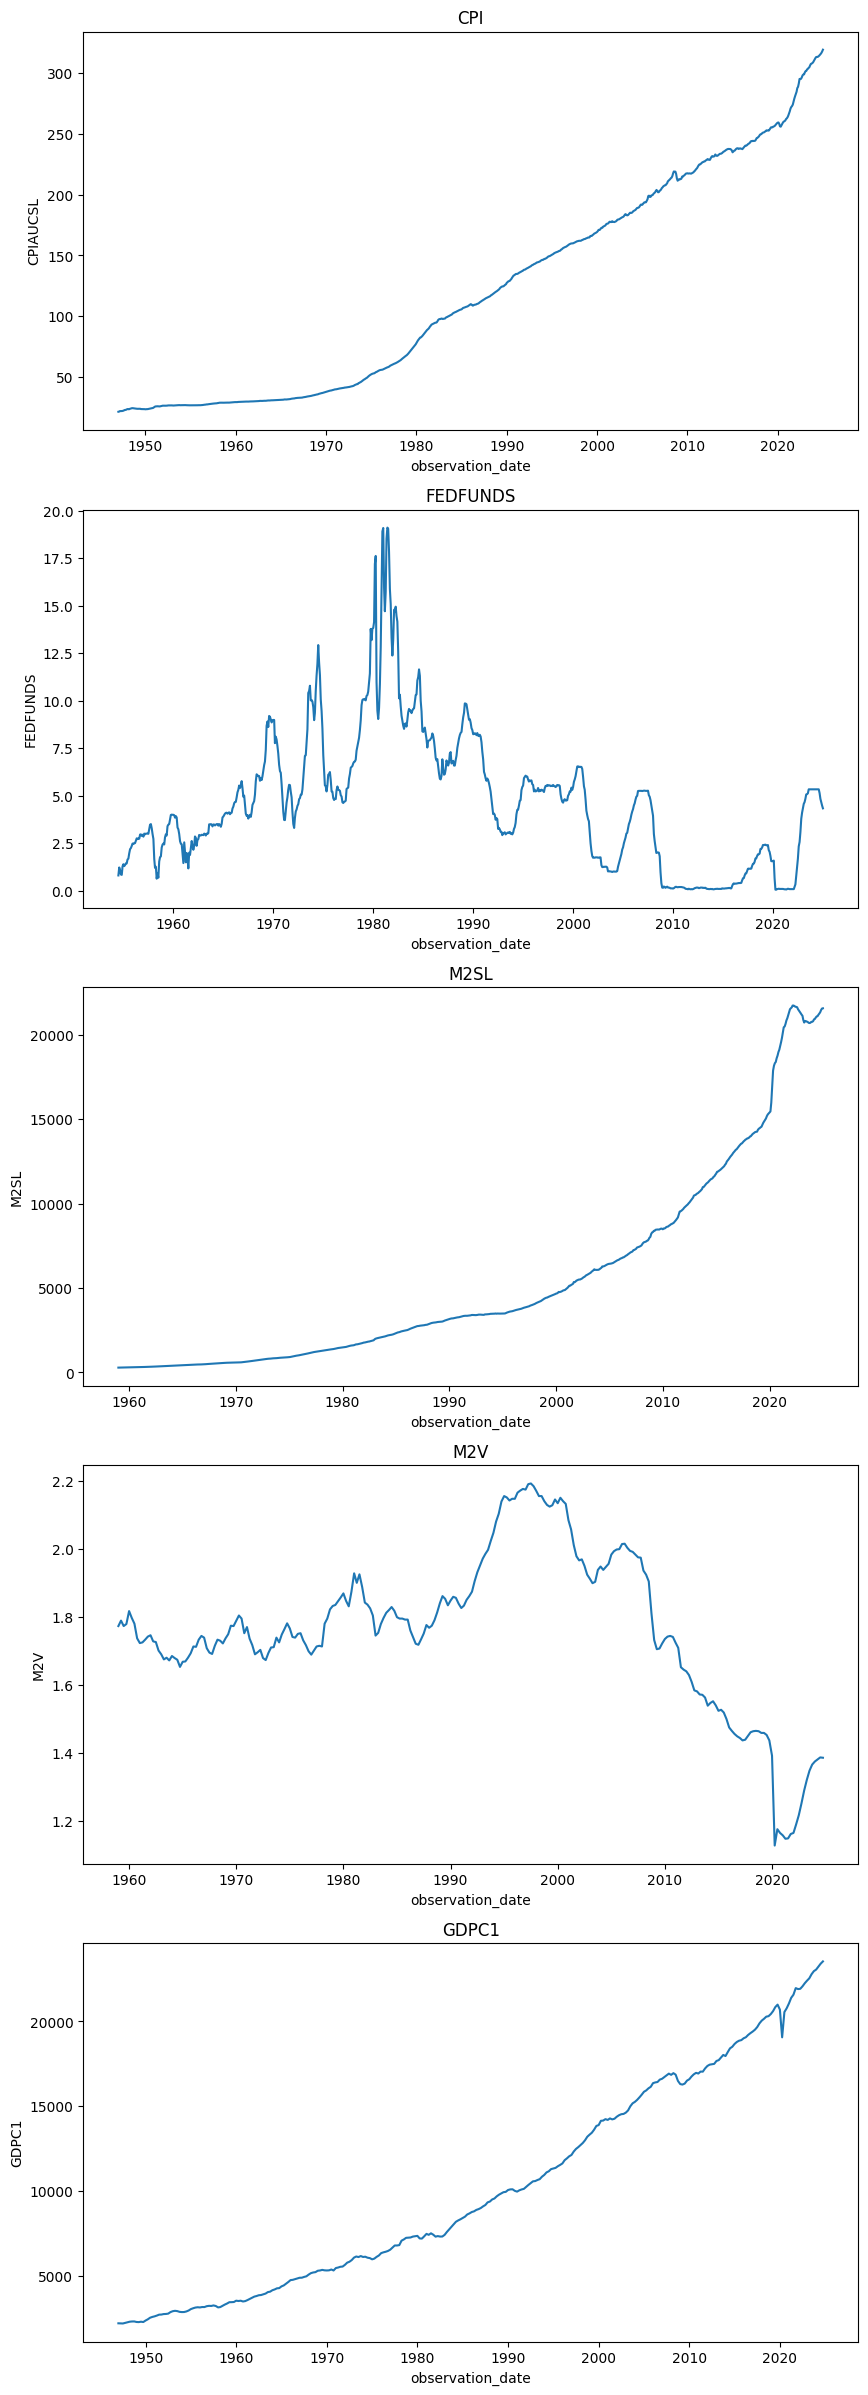

In [ ]:
# Plot the data to observe the years where it starts to have missing data
plt.figure(figsize=(10, 30))

plt.subplot(5, 1, 1)
sns.lineplot(data['CPIAUCSL'])
plt.title("CPI")

plt.subplot(5, 1, 2)
sns.lineplot(data['FEDFUNDS'])
plt.title("FEDFUNDS")

plt.subplot(5, 1, 3)
sns.lineplot(data['M2SL'])
plt.title("M2SL")

plt.subplot(5, 1, 4)
sns.lineplot(data['M2V'])
plt.title("M2V")

plt.subplot(5, 1, 5)
sns.lineplot(data['GDPC1'])
plt.title("GDPC1")


In [ ]:
# Slicing the data to include only the years of interest
data_sliced = data.loc["19600101":"20241001", :]
print(data_sliced)

                  CPIAUCSL  FEDFUNDS     M2SL    M2V      GDPC1
observation_date                                               
1960-01-01          29.370      3.99    298.2  1.817   3517.181
1960-02-01          29.410      3.97    298.4    NaN        NaN
1960-03-01          29.410      3.84    299.3    NaN        NaN
1960-04-01          29.540      3.92    300.1  1.797   3498.246
1960-05-01          29.570      3.85    300.9    NaN        NaN
...                    ...       ...      ...    ...        ...
2024-06-01         313.131      5.33  21079.2    NaN        NaN
2024-07-01         313.566      5.33  21093.6  1.387  23400.294
2024-08-01         314.131      5.33  21182.5    NaN        NaN
2024-09-01         314.851      5.13  21252.4    NaN        NaN
2024-10-01         315.564      4.83  21332.7  1.386  23536.293

[778 rows x 5 columns]


In [ ]:
# Let's check again the number of missing values per column
data_sliced.isnull().sum()

,0
CPIAUCSL,0
FEDFUNDS,0
M2SL,0
M2V,518
GDPC1,518


In [ ]:
# Build a function to compute missing percentage
def missing_value_percentage(df):
    missing_count = df.isnull().sum()
    total_rows = len(df)
    missing_percent = (missing_count / total_rows) * 100  # Percentage calculation
    missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percent})
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    return missing_df

In [ ]:
missing_value_percentage(data_sliced)

,Missing Count,Missing Percentage
M2V,518,66.580977
GDPC1,518,66.580977


In [ ]:
# describe() shows a quick statistic summary of your data
data_sliced.describe()

,CPIAUCSL,FEDFUNDS,M2SL,M2V,GDPC1
count,778.000000,778.000000,778.000000,260.000000,260.000000
mean,140.131022,4.799987,5468.928406,1.762988,11616.687962
std,82.810720,3.648065,5728.520281,0.231132,5772.246084
min,29.370000,0.050000,298.200000,1.128000,3470.278000
25%,56.025000,1.935000,1052.700000,1.683750,6358.431000
50%,139.900000,4.760000,3399.250000,1.752000,10398.551000
75%,212.943750,6.527500,7802.450000,1.904250,16637.096000
max,315.564000,19.100000,21724.300000,2.192000,23536.293000


# Linear Interpolation
GDPC1 and M2V are quaterly data. That's why some data are missing. The goal is to convert those columns to monthly data using interpolation.

In [ ]:
# Resample the columns
cols = ['M2V', 'GDPC1']
# Resample each column separately (interpolation)
for col in cols:
    data_sliced[col] = data_sliced[col].interpolate()

<ipython-input-128-d5d3b74b3145>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(data_sliced)

                  CPIAUCSL  FEDFUNDS     M2SL       M2V         GDPC1
observation_date                                                     
1960-01-01          29.370      3.99    298.2  1.817000   3517.181000
1960-02-01          29.410      3.97    298.4  1.810333   3510.869333
1960-03-01          29.410      3.84    299.3  1.803667   3504.557667
1960-04-01          29.540      3.92    300.1  1.797000   3498.246000
1960-05-01          29.570      3.85    300.9  1.791333   3503.959000
...                    ...       ...      ...       ...           ...
2024-06-01         313.131      5.33  21079.2  1.385000  23341.498000
2024-07-01         313.566      5.33  21093.6  1.387000  23400.294000
2024-08-01         314.131      5.33  21182.5  1.386667  23445.627000
2024-09-01         314.851      5.13  21252.4  1.386333  23490.960000
2024-10-01         315.564      4.83  21332.7  1.386000  23536.293000

[778 rows x 5 columns]


In [ ]:
# Check the count
data_sliced.describe()

,CPIAUCSL,FEDFUNDS,M2SL,M2V,GDPC1
count,778.000000,778.000000,778.000000,778.000000,778.000000
mean,140.131022,4.799987,5468.928406,1.763404,11611.777810
std,82.810720,3.648065,5728.520281,0.230508,5748.626019
min,29.370000,0.050000,298.200000,1.128000,3470.278000
25%,56.025000,1.935000,1052.700000,1.684500,6358.431000
50%,139.900000,4.760000,3399.250000,1.755500,10398.551000
75%,212.943750,6.527500,7802.450000,1.909083,16643.222000
max,315.564000,19.100000,21724.300000,2.192000,23536.293000


In [ ]:
# Distribution of CPI varible (right skewed)
fig1 = px.histogram(data_sliced, x='CPIAUCSL')
fig1.show()

In [ ]:
# Distribution of FEDFUNDS variable (right skewed)
fig2 = px.histogram(data_sliced, x='FEDFUNDS')
fig2.show()

In [ ]:
# Distribution of M2SL variable (right skewed)
fig3 = px.histogram(data_sliced, x='M2SL')
fig3.show()

In [ ]:
# Distribution of M2V	 variable (right skewed)
fig4 = px.histogram(data_sliced, x='M2V')
fig4.show()

In [ ]:
# Distribution of GDPC1 variable (right skewed)
fig5 = px.histogram(data_sliced, x='GDPC1')
fig5.show()

# Data Diagnosis

The Hodrick–Prescott filter (also known as Hodrick–Prescott decomposition) is a mathematical tool used in macroeconomics, especially in real business cycle theory, to remove the cyclical component of a time series from raw data.

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

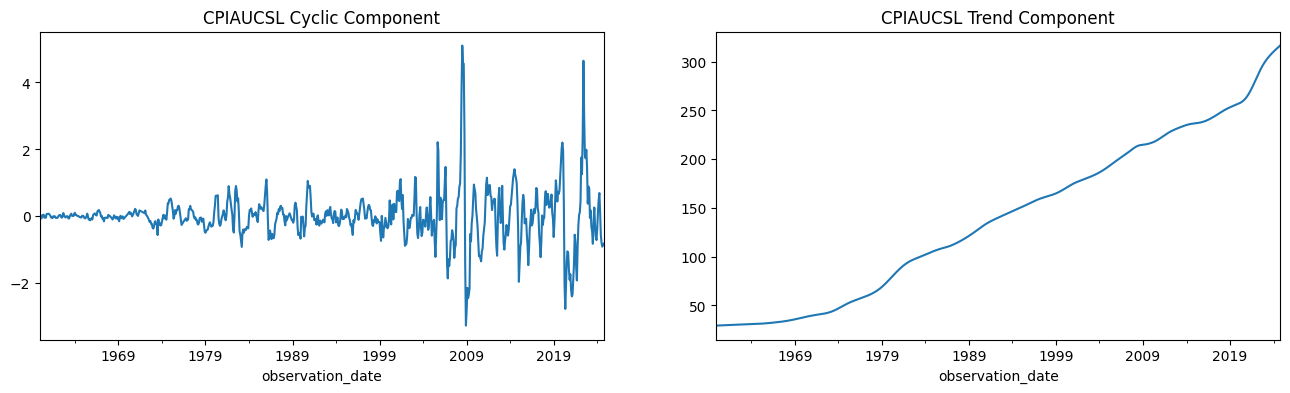

In [ ]:
# Separate Cyclic and Trend component
CPIAUCSL_cyclic, CPIAUCSL_trend = hpfilter(data_sliced['CPIAUCSL'])

fig, ax = plt.subplots(1,2, figsize=(16, 4))
CPIAUCSL_cyclic.plot(ax=ax[0], title='CPIAUCSL Cyclic Component')
CPIAUCSL_trend.plot(ax=ax[1], title='CPIAUCSL Trend Component')
plt.show()

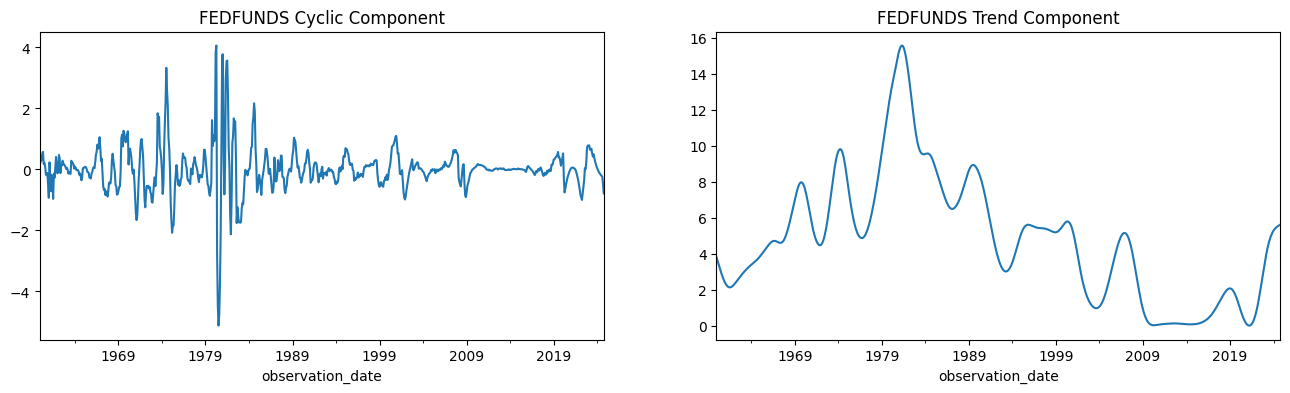

In [ ]:
# Separate Cyclic and Trend component
FEDFUNDS_cyclic, FEDFUNDS_trend = hpfilter(data_sliced['FEDFUNDS'])

fig, ax = plt.subplots(1,2, figsize=(16, 4))
FEDFUNDS_cyclic.plot(ax=ax[0], title='FEDFUNDS Cyclic Component')
FEDFUNDS_trend.plot(ax=ax[1], title='FEDFUNDS Trend Component')
plt.show()

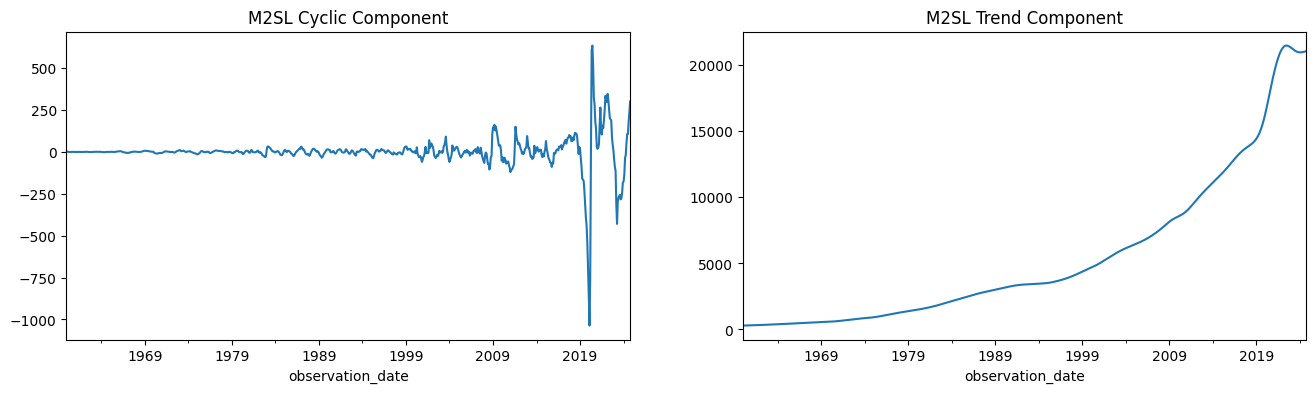

In [ ]:
# Separate Cyclic and Trend component
M2SL_cyclic, M2SL_trend = hpfilter(data_sliced['M2SL'])

fig, ax = plt.subplots(1,2, figsize=(16, 4))
M2SL_cyclic.plot(ax=ax[0], title='M2SL Cyclic Component')
M2SL_trend.plot(ax=ax[1], title='M2SL Trend Component')
plt.show()

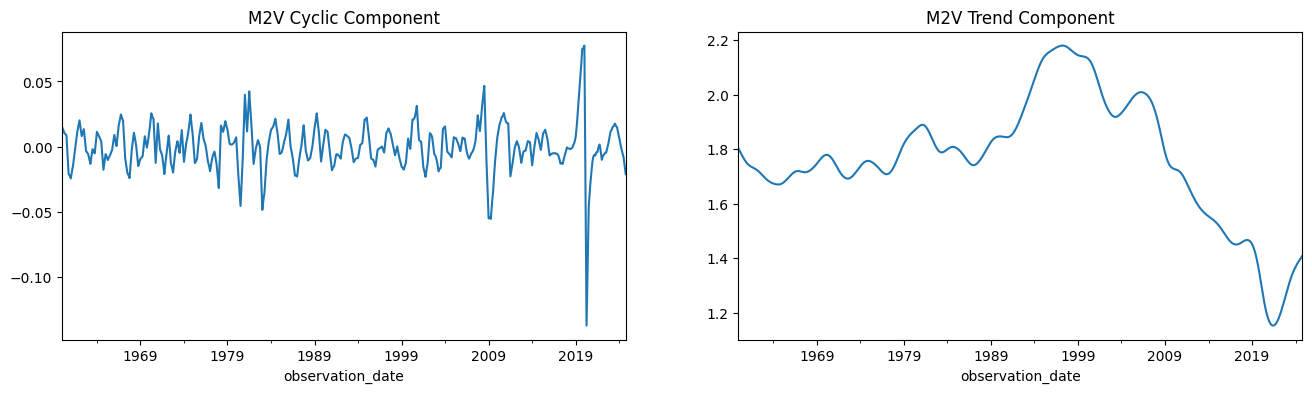

In [ ]:
# Separate Cyclic and Trend component
M2V_cyclic, M2V_trend = hpfilter(data_sliced['M2V'])

fig, ax = plt.subplots(1,2, figsize=(16, 4))
M2V_cyclic.plot(ax=ax[0], title='M2V Cyclic Component')
M2V_trend.plot(ax=ax[1], title='M2V Trend Component')
plt.show()

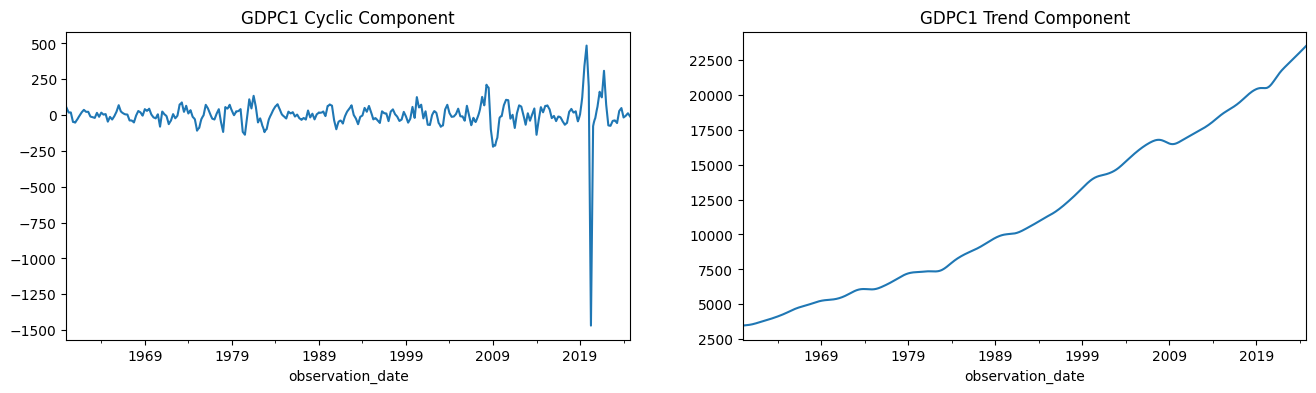

In [ ]:
# Separate Cyclic and Trend component
GDP_cyclic, GDP_trend = hpfilter(data_sliced['GDPC1'])

fig, ax = plt.subplots(1,2, figsize=(16, 4))
GDP_cyclic.plot(ax=ax[0], title='GDPC1 Cyclic Component')
GDP_trend.plot(ax=ax[1], title='GDPC1 Trend Component')
plt.show()

# In depth Analysis
As we can observe, our variables contain trends and need to be transformed.

In [ ]:
# Load libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import VAR, adfuller, kpss
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# Splitting the data between training and testing
data_train = data_sliced.loc[:'2020']
data_test = data_sliced.loc['2021':]
data_train.index

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='observation_date', length=732, freq='MS')

In [ ]:
# Scale the data to ensure homogeneity
scale = StandardScaler()
scale.fit(data_train)

datatrain_sc = pd.DataFrame(scale.transform(data_train),
                            index=data_train.index,
                              columns=data_train.columns)

datatest_sc = pd.DataFrame(scale.transform(data_test),
                           index=data_test.index,
                             columns=data_test.columns)

data_test[0:5]

,CPIAUCSL,FEDFUNDS,M2SL,M2V,GDPC1
observation_date,,,,,
2021-01-01,262.639,0.09,19335.0,1.158000,21058.379000
2021-02-01,263.573,0.08,19571.2,1.154667,21168.587667
2021-03-01,264.847,0.07,19810.0,1.151333,21278.796333
2021-04-01,266.625,0.07,20133.3,1.148000,21389.005000
2021-05-01,268.404,0.06,20437.8,1.148333,21449.810333


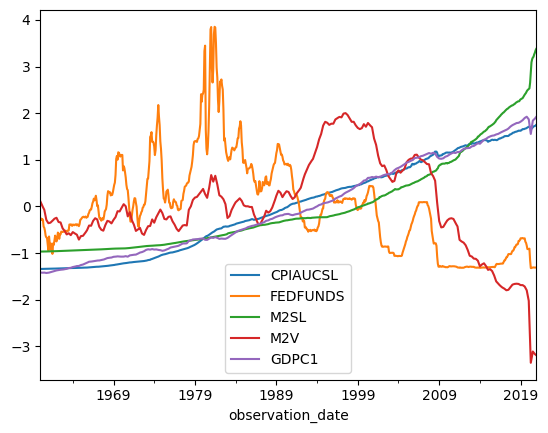

In [ ]:
# Plot on the same scale
datatrain_sc.plot()
plt.show()

In [ ]:
# function to print results for adf and kpss to check for stationarity
def print_results(output, test='adf'):

    test_score = output[0]
    pval = output[1]
    lags = output[2]

    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'

    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value

    return pd.Series(output_dict, name=test)

In [ ]:
# Show results for CPI
adf_output = adfuller(datatrain_sc['CPIAUCSL'])
kpss_output = kpss(datatrain_sc['CPIAUCSL'])

pd.concat([print_results(adf_output, 'adf'), print_results(kpss_output, 'kpss')], axis=1)

<ipython-input-147-8a346c0298c0>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




,adf,kpss
Test Statistic,1.250521,4.171566
p-value,0.996317,0.01
Numbers of lags,15,17
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.439516,0.739
Critical Value (5%),-2.865585,0.463
Critical Value (10%),-2.568924,0.347
Critical Value (2.5%),NaN,0.574


In [ ]:
# show results for FEDFUNDS
adf_output = adfuller(datatrain_sc['FEDFUNDS'])
kpss_output = kpss(datatrain_sc['FEDFUNDS'])

pd.concat([print_results(adf_output, 'adf'), print_results(kpss_output, 'kpss')], axis=1)

<ipython-input-148-525bd325b616>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




,adf,kpss
Test Statistic,-2.642544,1.630463
p-value,0.084519,0.01
Numbers of lags,17,17
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.439542,0.739
Critical Value (5%),-2.865596,0.463
Critical Value (10%),-2.56893,0.347
Critical Value (2.5%),NaN,0.574


In [ ]:
# Show results for GDP
adf_output = adfuller(datatrain_sc['GDPC1'])
kpss_output = kpss(datatrain_sc['GDPC1'])

pd.concat([print_results(adf_output, 'adf'), print_results(kpss_output, 'kpss')], axis=1)

<ipython-input-149-1356863dc55b>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




,adf,kpss
Test Statistic,1.200902,4.125432
p-value,0.995992,0.01
Numbers of lags,16,17
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.439529,0.739
Critical Value (5%),-2.865591,0.463
Critical Value (10%),-2.568927,0.347
Critical Value (2.5%),NaN,0.574


In [ ]:
# Show results for M2SL
adf_output = adfuller(datatrain_sc['M2SL'])
kpss_output = kpss(datatrain_sc['M2SL'])

pd.concat([print_results(adf_output, 'adf'), print_results(kpss_output, 'kpss')], axis=1)

<ipython-input-150-1410fcfaca03>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




,adf,kpss
Test Statistic,4.437545,3.601321
p-value,1.0,0.01
Numbers of lags,18,17
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.439555,0.739
Critical Value (5%),-2.865602,0.463
Critical Value (10%),-2.568933,0.347
Critical Value (2.5%),NaN,0.574


In [ ]:
# Show results for M2V
adf_output = adfuller(datatrain_sc['M2V'])
kpss_output = kpss(datatrain_sc['M2V'])

pd.concat([print_results(adf_output, 'adf'), print_results(kpss_output, 'kpss')], axis=1)

,adf,kpss
Test Statistic,0.080272,0.713761
p-value,0.964688,0.012294
Numbers of lags,16,17
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.439529,0.739
Critical Value (5%),-2.865591,0.463
Critical Value (10%),-2.568927,0.347
Critical Value (2.5%),NaN,0.574


In [ ]:
# set up a generalized function for the plot labels
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)

    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'

    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non Stationary'
    return (kpssh, adfh)

#  set up the comparison plotting function
def plot_comparison(methods, plot_type='line'):
    n = len(methods) // 2
    fig, ax = plt.subplots(n,2, sharex=True, figsize=(20,10))
    for i, method in enumerate(methods):
        method.dropna(inplace=True)
        name = [n for n in globals() if globals()[n] is method]
        v, r = i // 2, i % 2

        kpss_s, adf_s = check_stationarity(method)

        method.plot(kind=plot_type,
                    ax=ax[v,r],
                    legend=False,
                    title=f'{name[0].upper()} KPSS={kpss_s}, ADF={adf_s}')
        ax[v,r].title.set_size(14)
        method.rolling(52).mean().plot(ax=ax[v,r], legend=False)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up tab

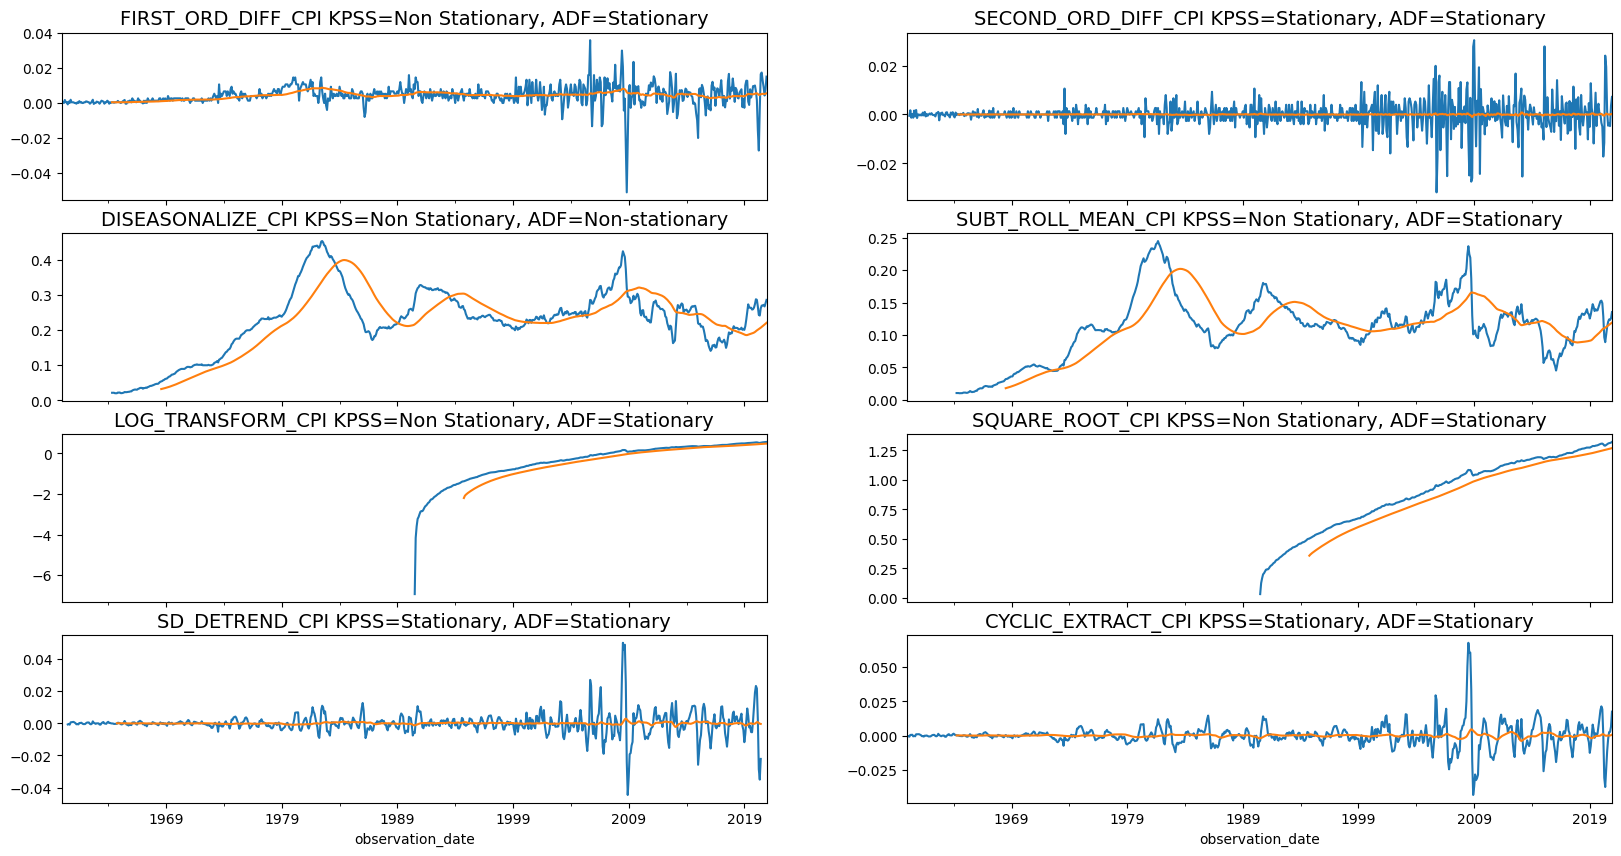

In [ ]:
## Compare how each transformation affects stationarity for CPI

# using first order differencing (detrending)
first_ord_diff_CPI = datatrain_sc['CPIAUCSL'].diff().dropna()

# using second order differencing
second_ord_diff_CPI = datatrain_sc['CPIAUCSL'].diff().diff().dropna()

# differencing to remove seasonality
diseasonalize_CPI = datatrain_sc['CPIAUCSL'].diff(52).dropna()

# using rolling mean
rolling_mean_CPI = datatrain_sc['CPIAUCSL'].rolling(window=52).mean()
subt_roll_mean_CPI = datatrain_sc['CPIAUCSL'] - rolling_mean_CPI

# log transform
log_transform_CPI = np.log(datatrain_sc['CPIAUCSL'])

# Square root transform
square_root_CPI = np.sqrt(datatrain_sc['CPIAUCSL'])

# using seasonal_decompose to remove trend
decomp_CPI = seasonal_decompose(datatrain_sc['CPIAUCSL'])
sd_detrend_CPI = (decomp_CPI.observed - decomp_CPI.trend)

# using hp_filter
cyclic_extract_CPI, trend_CPI = hpfilter(datatrain_sc['CPIAUCSL'])

# combine the methods into a list
methods_CPI = [first_ord_diff_CPI, second_ord_diff_CPI,
           diseasonalize_CPI, subt_roll_mean_CPI,
           log_transform_CPI, square_root_CPI,
           sd_detrend_CPI, cyclic_extract_CPI]

plot = plot_comparison(methods_CPI)
plt.show()
#warnings.simplefilter(action='ignore')

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up tab

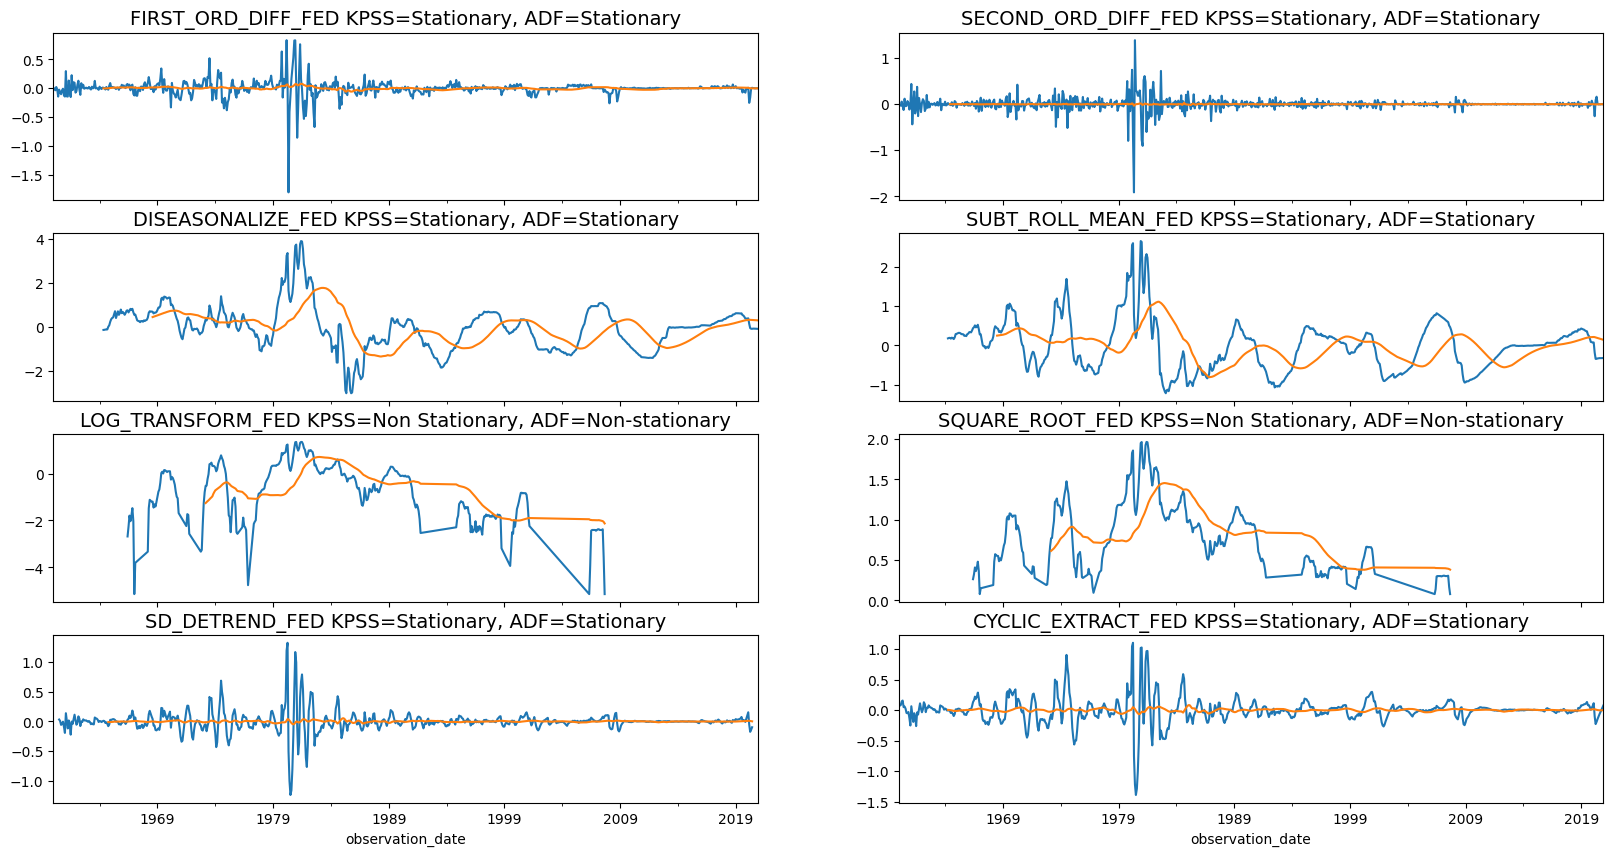

In [ ]:
## Compare how each transformation affects stationarity for FEDFUNDS

# using first order differencing (detrending)
first_ord_diff_FED = datatrain_sc['FEDFUNDS'].diff().dropna()

# using second order differencing
second_ord_diff_FED = datatrain_sc['FEDFUNDS'].diff().diff().dropna()

# differencing to remove seasonality
diseasonalize_FED = datatrain_sc['FEDFUNDS'].diff(52).dropna()

# using rolling mean
rolling_mean_FED = datatrain_sc['FEDFUNDS'].rolling(window=52).mean()
subt_roll_mean_FED = datatrain_sc['FEDFUNDS'] - rolling_mean_FED

# log transform
log_transform_FED = np.log(datatrain_sc['FEDFUNDS'])

# Square root transform
square_root_FED = np.sqrt(datatrain_sc['FEDFUNDS'])

# using seasonal_decompose to remove trend
decomp_FED = seasonal_decompose(datatrain_sc['FEDFUNDS'])
sd_detrend_FED = (decomp_FED.observed - decomp_FED.trend)

# using hp_filter
cyclic_extract_FED, trend_FED = hpfilter(datatrain_sc['FEDFUNDS'])

# combine the methods into a list
methods_FED = [first_ord_diff_FED, second_ord_diff_FED,
           diseasonalize_FED, subt_roll_mean_FED,
           log_transform_FED, square_root_FED,
           sd_detrend_FED, cyclic_extract_FED]

plot = plot_comparison(methods_FED)
plt.show()
#warnings.simplefilter(action='ignore')

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up tab

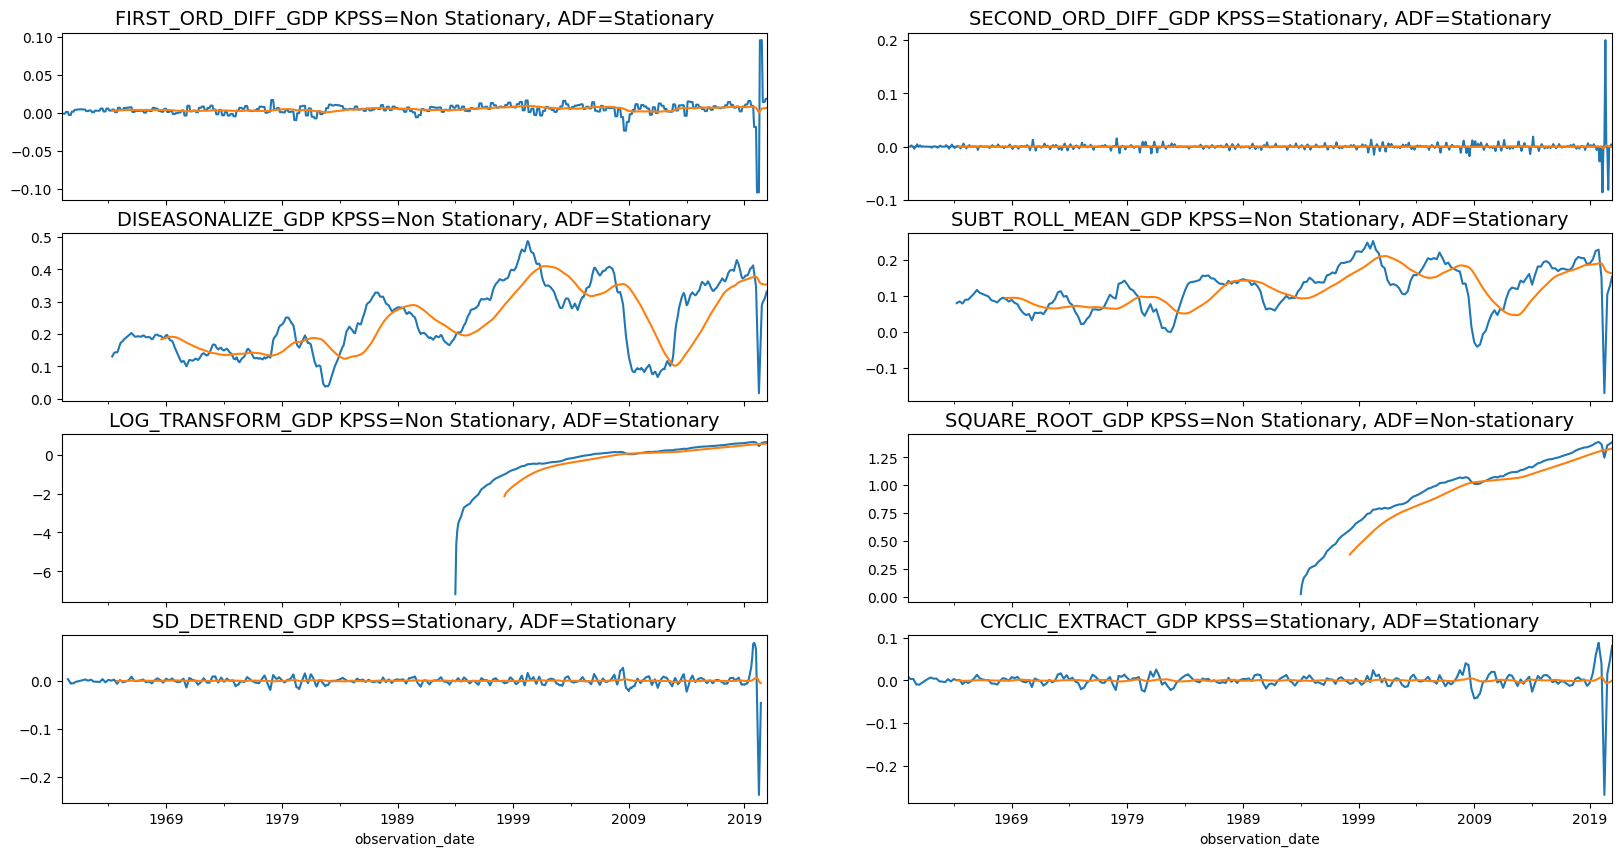

In [ ]:
## Compare how each transformation affects stationarity for GDPC1

# using first order differencing (detrending)
first_ord_diff_GDP = datatrain_sc['GDPC1'].diff().dropna()

# using second order differencing
second_ord_diff_GDP = datatrain_sc['GDPC1'].diff().diff().dropna()

# differencing to remove seasonality
diseasonalize_GDP = datatrain_sc['GDPC1'].diff(52).dropna()

# using rolling mean
rolling_mean_GDP = datatrain_sc['GDPC1'].rolling(window=52).mean()
subt_roll_mean_GDP = datatrain_sc['GDPC1'] - rolling_mean_GDP

# log transform
log_transform_GDP = np.log(datatrain_sc['GDPC1'])

# Square root transform
square_root_GDP = np.sqrt(datatrain_sc['GDPC1'])

# using seasonal_decompose to remove trend
decomp_GDP = seasonal_decompose(datatrain_sc['GDPC1'])
sd_detrend_GDP = (decomp_GDP.observed - decomp_GDP.trend)

# using hp_filter
cyclic_extract_GDP, trend_GDP = hpfilter(datatrain_sc['GDPC1'])

# combine the methods into a list
methods_GDP = [first_ord_diff_GDP, second_ord_diff_GDP,
           diseasonalize_GDP, subt_roll_mean_GDP,
           log_transform_GDP, square_root_GDP,
           sd_detrend_GDP, cyclic_extract_GDP]

plot = plot_comparison(methods_GDP)
plt.show()
#warnings.simplefilter(action='ignore')

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up tab

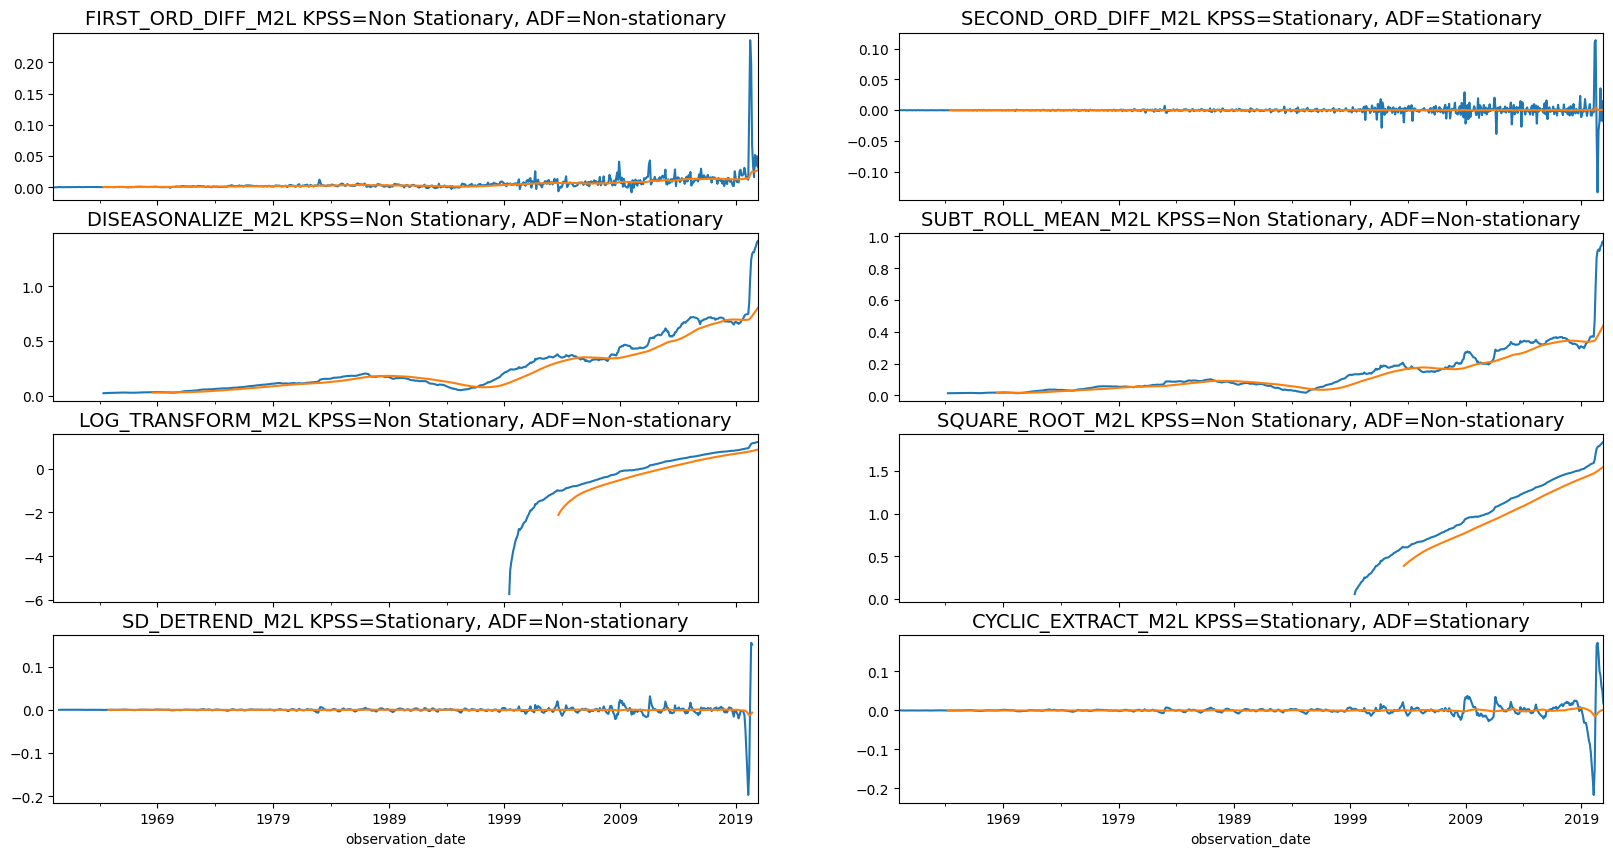

In [ ]:
## Compare how each transformation affects stationarity for M2SL

# using first order differencing (detrending)
first_ord_diff_M2L = datatrain_sc['M2SL'].diff().dropna()

# using second order differencing
second_ord_diff_M2L = datatrain_sc['M2SL'].diff().diff().dropna()

# differencing to remove seasonality
diseasonalize_M2L = datatrain_sc['M2SL'].diff(52).dropna()

# using rolling mean
rolling_mean_M2L = datatrain_sc['M2SL'].rolling(window=52).mean()
subt_roll_mean_M2L = datatrain_sc['M2SL'] - rolling_mean_M2L

# log transform
log_transform_M2L = np.log(datatrain_sc['M2SL'])

# Square root transform
square_root_M2L = np.sqrt(datatrain_sc['M2SL'])

# using seasonal_decompose to remove trend
decomp_M2L = seasonal_decompose(datatrain_sc['M2SL'])
sd_detrend_M2L = (decomp_M2L.observed - decomp_M2L.trend)

# using hp_filter
cyclic_extract_M2L, trend_M2L = hpfilter(datatrain_sc['M2SL'])

# combine the methods into a list
methods_M2L = [first_ord_diff_M2L, second_ord_diff_M2L,
           diseasonalize_M2L, subt_roll_mean_M2L,
           log_transform_M2L, square_root_M2L,
           sd_detrend_M2L, cyclic_extract_M2L]

plot = plot_comparison(methods_M2L)
plt.show()
#warnings.simplefilter(action='ignore')

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-152-2c6d5d80078b>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up tab

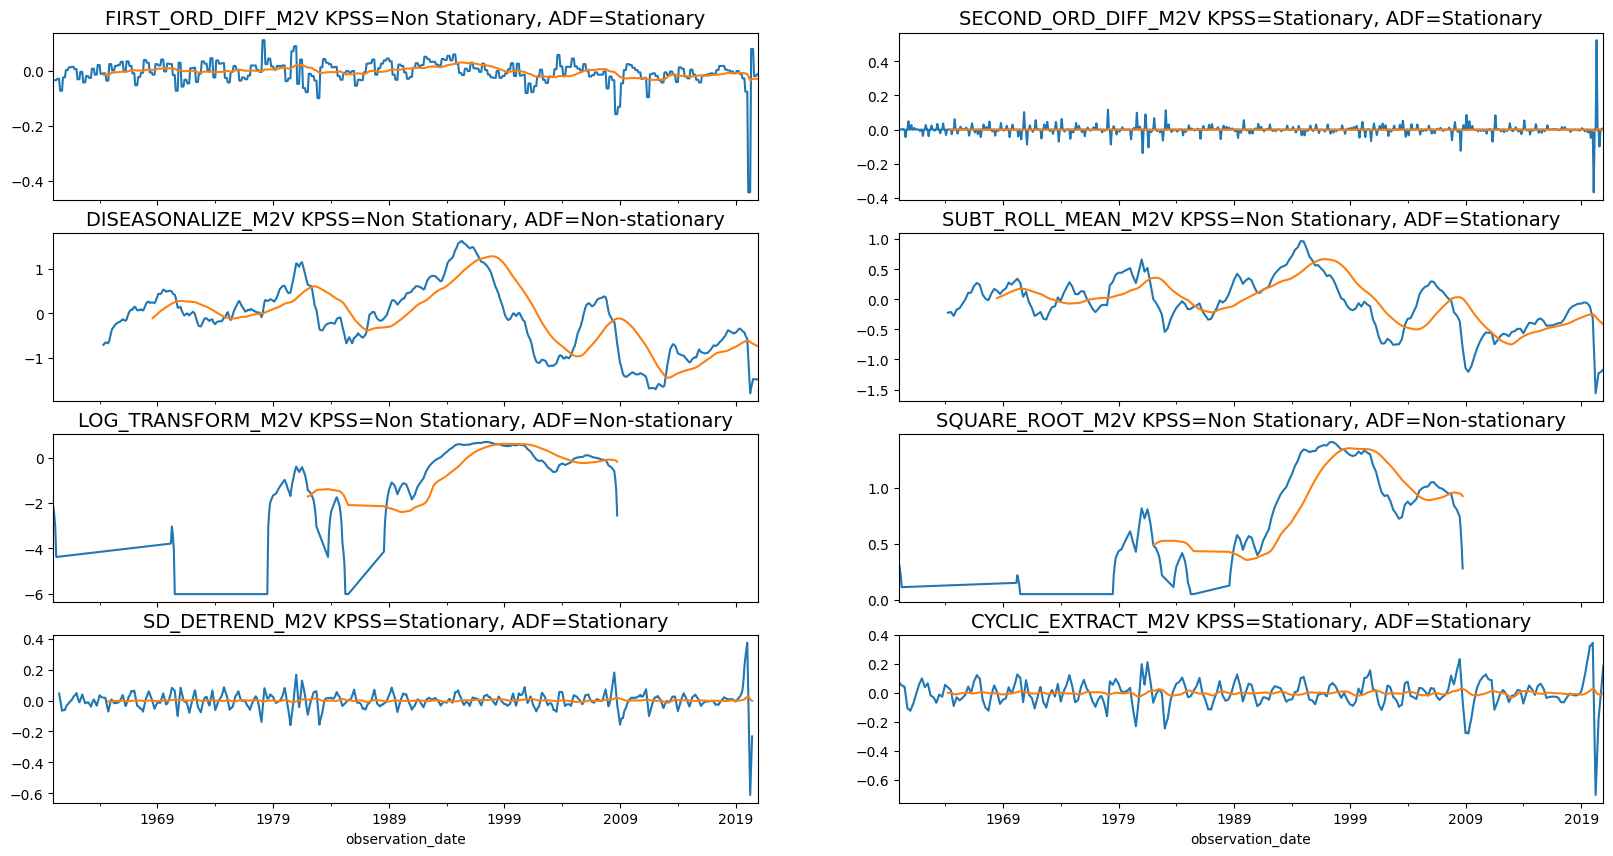

In [ ]:
## Compare how each transformation affects stationarity for M2V

# using first order differencing (detrending)
first_ord_diff_M2V = datatrain_sc['M2V'].diff().dropna()

# using second order differencing
second_ord_diff_M2V = datatrain_sc['M2V'].diff().diff().dropna()

# differencing to remove seasonality
diseasonalize_M2V = datatrain_sc['M2V'].diff(52).dropna()

# using rolling mean
rolling_mean_M2V = datatrain_sc['M2V'].rolling(window=52).mean()
subt_roll_mean_M2V = datatrain_sc['M2V'] - rolling_mean_M2V

# log transform
log_transform_M2V = np.log(datatrain_sc['M2V'])

# Square root transform
square_root_M2V = np.sqrt(datatrain_sc['M2V'])

# using seasonal_decompose to remove trend
decomp_M2V = seasonal_decompose(datatrain_sc['M2V'])
sd_detrend_M2V = (decomp_M2V.observed - decomp_M2V.trend)

# using hp_filter
cyclic_extract_M2V, trend_M2V = hpfilter(datatrain_sc['M2V'])

# combine the methods into a list
methods_M2V = [first_ord_diff_M2V, second_ord_diff_M2V,
           diseasonalize_M2V, subt_roll_mean_M2V,
           log_transform_M2V, square_root_M2V,
           sd_detrend_M2V, cyclic_extract_M2V]

plot = plot_comparison(methods_M2V)
plt.show()
#warnings.simplefilter(action='ignore')

In [ ]:
# Transform all columns to second order difference since
datatrain_sc = datatrain_sc.diff().diff().dropna()

In [ ]:
# Show the new dataframe including transformation
datatrain_sc

,CPIAUCSL,FEDFUNDS,M2SL,M2V,GDPC1
observation_date,,,,,
1960-03-01,-0.000531,-0.029883,1.617185e-04,-1.117162e-15,0.000000e+00
1960-04-01,0.001727,0.057049,-2.310264e-05,1.117162e-15,2.220446e-16
1960-05-01,-0.001328,-0.040750,-2.220446e-16,5.032800e-03,2.301172e-03
1960-06-01,0.000133,-0.124965,1.386158e-04,1.120631e-15,-2.220446e-16
1960-07-01,-0.001328,0.119532,9.241055e-05,-1.120631e-15,0.000000e+00
...,...,...,...,...,...
2020-08-01,-0.004595,0.000000,-1.827419e-02,-9.897841e-02,-8.096765e-02
2020-09-01,-0.003758,-0.005433,3.553186e-02,1.332268e-15,2.220446e-16
2020-10-01,-0.004768,0.002717,-1.693423e-02,-8.881784e-16,0.000000e+00


In [ ]:
# Granger between FEDFUNDS and CPIAUCSL to see if one causes the other
granger = grangercausalitytests(datatrain_sc[['CPIAUCSL', 'FEDFUNDS']], maxlag=20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6927  , p=0.1937  , df_denom=726, df_num=1
ssr based chi2 test:   chi2=1.6997  , p=0.1923  , df=1
likelihood ratio test: chi2=1.6977  , p=0.1926  , df=1
parameter F test:         F=1.6927  , p=0.1937  , df_denom=726, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0905  , p=0.1244  , df_denom=723, df_num=2
ssr based chi2 test:   chi2=4.2099  , p=0.1219  , df=2
likelihood ratio test: chi2=4.1978  , p=0.1226  , df=2
parameter F test:         F=2.0905  , p=0.1244  , df_denom=723, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4648  , p=0.2229  , df_denom=720, df_num=3
ssr based chi2 test:   chi2=4.4372  , p=0.2180  , df=3
likelihood ratio test: chi2=4.4237  , p=0.2192  , df=3
parameter F test:         F=1.4648  , p=0.2229  , df_denom=720, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2845  , p=0.2745  

In [ ]:
# Granger between FEDFUNDS and M2V
granger = grangercausalitytests(datatrain_sc[['M2V', 'FEDFUNDS']], maxlag=20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.1174  , p=0.0026  , df_denom=726, df_num=1
ssr based chi2 test:   chi2=9.1551  , p=0.0025  , df=1
likelihood ratio test: chi2=9.0981  , p=0.0026  , df=1
parameter F test:         F=9.1174  , p=0.0026  , df_denom=726, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.8797  , p=0.0079  , df_denom=723, df_num=2
ssr based chi2 test:   chi2=9.8269  , p=0.0073  , df=2
likelihood ratio test: chi2=9.7611  , p=0.0076  , df=2
parameter F test:         F=4.8797  , p=0.0079  , df_denom=723, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1827  , p=0.0234  , df_denom=720, df_num=3
ssr based chi2 test:   chi2=9.6408  , p=0.0219  , df=3
likelihood ratio test: chi2=9.5775  , p=0.0225  , df=3
parameter F test:         F=3.1827  , p=0.0234  , df_denom=720, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7374  , p=0.0279  

In [ ]:
# Granger between FEDFUNDS and M2SL
granger = grangercausalitytests(datatrain_sc[['M2SL', 'FEDFUNDS']], maxlag=20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6164  , p=0.1062  , df_denom=726, df_num=1
ssr based chi2 test:   chi2=2.6272  , p=0.1050  , df=1
likelihood ratio test: chi2=2.6225  , p=0.1054  , df=1
parameter F test:         F=2.6164  , p=0.1062  , df_denom=726, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2315  , p=0.2925  , df_denom=723, df_num=2
ssr based chi2 test:   chi2=2.4801  , p=0.2894  , df=2
likelihood ratio test: chi2=2.4759  , p=0.2900  , df=2
parameter F test:         F=1.2315  , p=0.2925  , df_denom=723, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6867  , p=0.5603  , df_denom=720, df_num=3
ssr based chi2 test:   chi2=2.0801  , p=0.5559  , df=3
likelihood ratio test: chi2=2.0771  , p=0.5566  , df=3
parameter F test:         F=0.6867  , p=0.5603  , df_denom=720, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5589  , p=0.6926  

In [ ]:
# Granger between FEDFUNDS and GDPC1
granger = grangercausalitytests(datatrain_sc[['GDPC1', 'FEDFUNDS']], maxlag=20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3243  , p=0.2502  , df_denom=726, df_num=1
ssr based chi2 test:   chi2=1.3298  , p=0.2488  , df=1
likelihood ratio test: chi2=1.3286  , p=0.2491  , df=1
parameter F test:         F=1.3243  , p=0.2502  , df_denom=726, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9959  , p=0.3699  , df_denom=723, df_num=2
ssr based chi2 test:   chi2=2.0057  , p=0.3668  , df=2
likelihood ratio test: chi2=2.0029  , p=0.3673  , df=2
parameter F test:         F=0.9959  , p=0.3699  , df_denom=723, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6278  , p=0.5972  , df_denom=720, df_num=3
ssr based chi2 test:   chi2=1.9018  , p=0.5930  , df=3
likelihood ratio test: chi2=1.8993  , p=0.5936  , df=3
parameter F test:         F=0.6278  , p=0.5972  , df_denom=720, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7017  , p=0.5909  

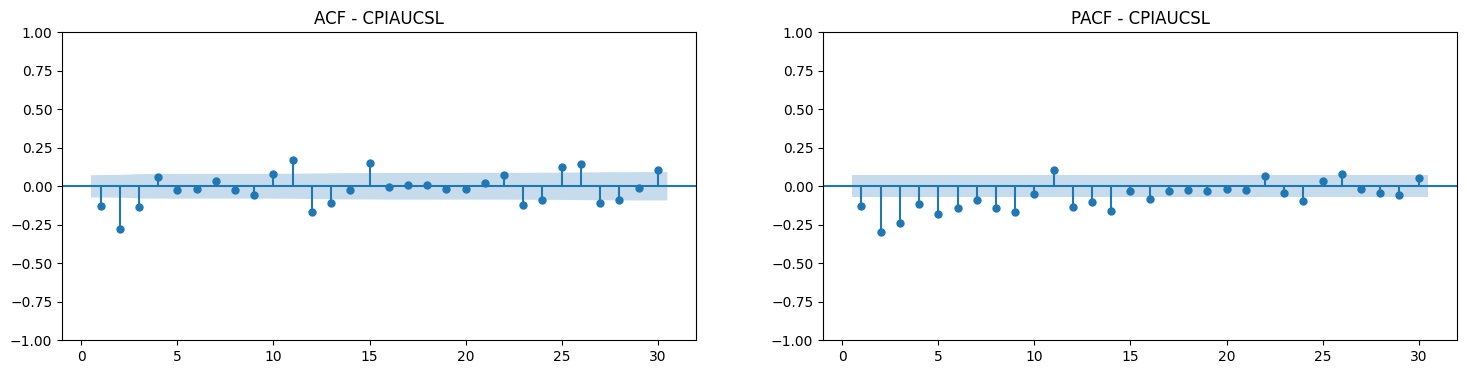

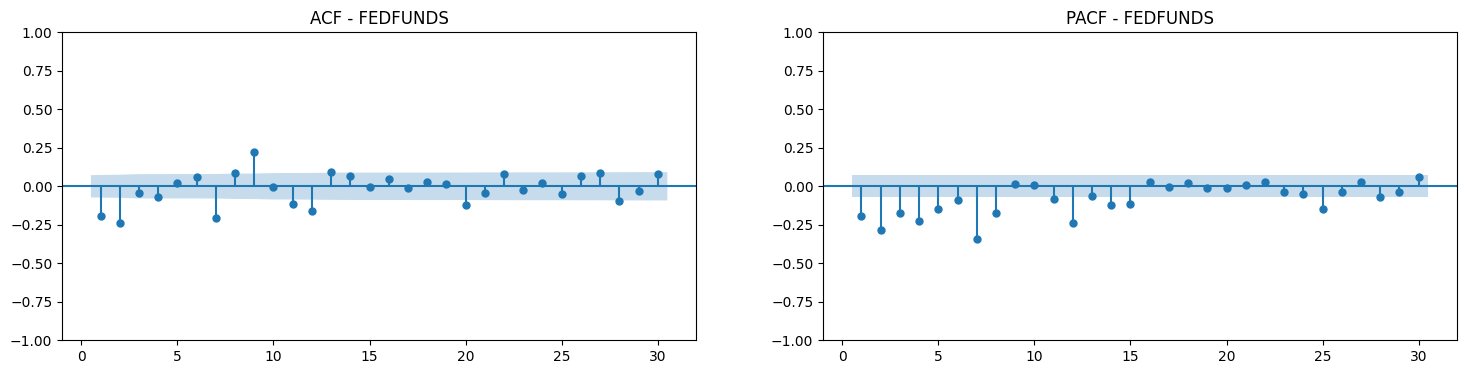

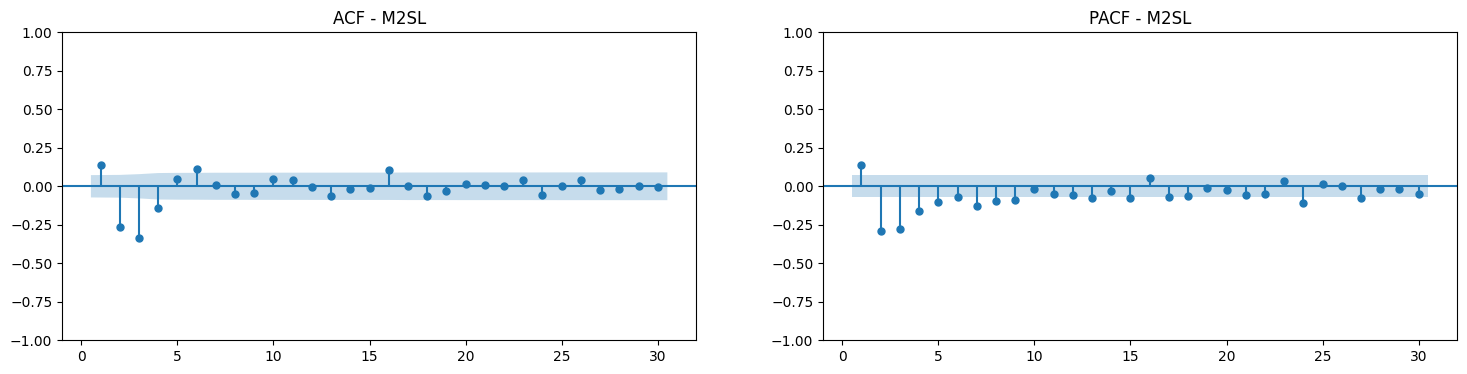

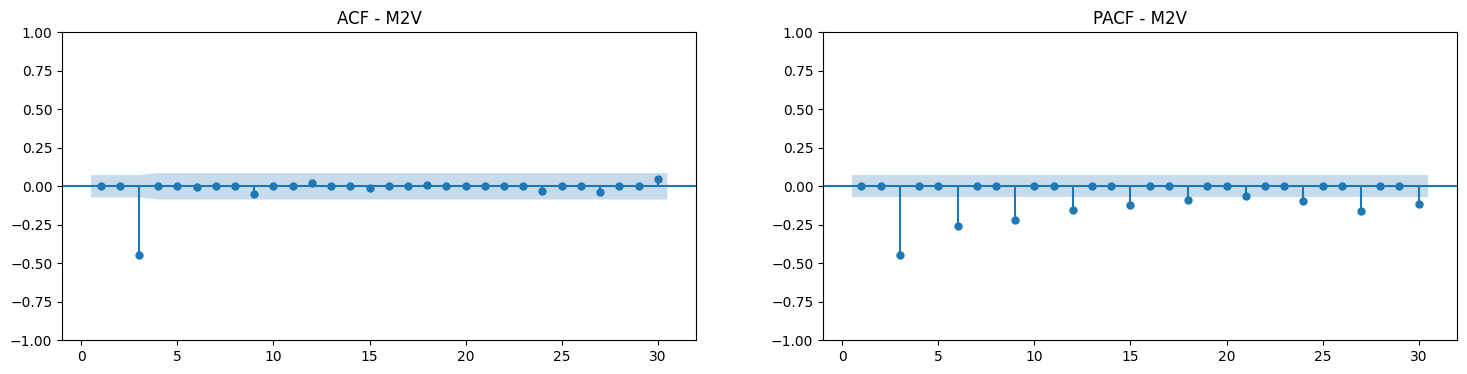

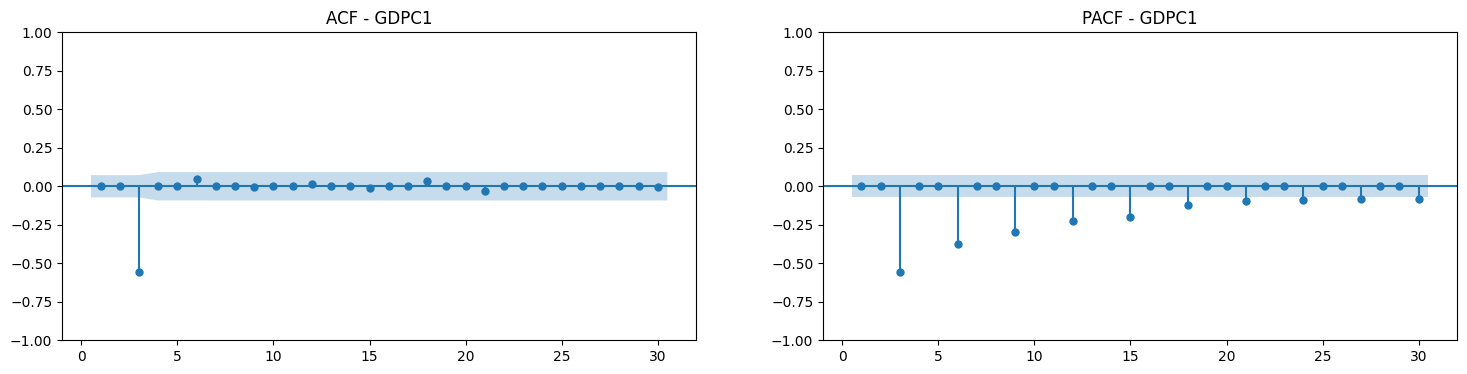

In [ ]:
# Determine autocorrelation for each variables
for col in datatrain_sc.columns:
    fig, ax = plt.subplots(1,2, figsize=(18,4))
    plot_acf(datatrain_sc[col], zero=False,
             lags=30, ax=ax[0], title=f'ACF - {col}')
    plot_pacf(datatrain_sc[col], zero=False,
              lags=30, ax=ax[1], title=f'PACF - {col}');
plt.show()

In [ ]:
# Determine the ideal number of lags based on different scores
model = VAR(endog=datatrain_sc)
res = model.select_order(maxlags=10)
res.summary()
res.selected_orders
print(f'\nAIC: {res.aic} , BIC: {res.bic}, HQ: {res.hqic}, FPE: {res.fpe}')


AIC: 9 , BIC: 6, HQ: 8, FPE: 9


In [ ]:
# Check the results
results = model.fit(maxlags=9, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Mar, 2025
Time:                     21:16:18
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -42.4870
Nobs:                     721.000    HQIC:                  -43.3841
Log likelihood:           10958.1    FPE:                8.20183e-20
AIC:                     -43.9482    Det(Omega_mle):     6.02019e-20
--------------------------------------------------------------------
Results for equation CPIAUCSL
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.000006         0.000178            0.036           0.971
L1.CPIAUCSL        -0.432382         0.038245          -11.306           0.000
L1.FEDFUNDS         0.000690         0.001454            0.475   

In [ ]:
lag_order = results.k_ar
print('\nLag Order:', lag_order)


Lag Order: 9


# Check for Normality and homoscedasticity for the Response Variable

## FEDFUND INTEREST RATE

In [ ]:
adf_result = adfuller(datatrain_sc['FEDFUNDS'],store=True)
adf_result[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     133.6
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          1.50e-193
Time:                        21:16:18   Log-Likelihood:                 501.83
No. Observations:                 715   AIC:                            -971.7
Df Residuals:                     699   BIC:                            -898.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -7.4624      0.545    -13.688      0.000      -8.533      -6.392
x2             5.9526      0.529     11.254      0.000       4.914       6.991
x3             5.3509      0.507     10.556      0.000       4.356       6.346
x4             4.7710      0.478      9.987      0.000       3.833       5.709
x5             4.1387      0.446      9.281      0.000       3.263       5.014
x6             3.5422      0.410      8.643      0.000       2.738       4.347
x7             3.0308      0.369      8.214      0.000       2.306       3.755
x8             2.3439      0.323      7.252      0.000       1.709       2.978
x9             1.8644      0.274      6.811      0.000       1.327       2.402
x10            1.5672      0.228      6.885      0.000       1.120       2.014
x11            1.2363      0.183      6.770      0.000       0.878       1.595
x12            0.8808      0.141      6.263      0.000       0.605       1.157
x13            0.4824      0.103      4.693      0.000       0.281       0.684
x14            0.2949      0.067      4.395      0.000       0.163       0.427
x15            0.1147      0.037      3.088      0.002       0.042       0.188
const       2.106e-05      0.005      0.005      0.996      -0.009       0.009
==============================================================================
Omnibus:                      695.654   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112315.813
Skew:                          -3.856   Prob(JB):                         0.00
Kurtosis:                      63.914   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_FED = AutoReg(datatrain_sc['FEDFUNDS'].dropna(), lags=10, trend='n').fit()
model_FED.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               FEDFUNDS   No. Observations:                  730
Model:                    AutoReg(10)   Log Likelihood                 462.691
Method:               Conditional MLE   S.D. of innovations              0.127
Date:                Thu, 20 Mar 2025   AIC                           -903.381
Time:                        21:16:18   BIC                           -853.009
Sample:                    01-01-1961   HQIC                          -883.935
                         - 12-01-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
FEDFUNDS.L1     -0.4669      0.037    -12.530      0.000      -0.540      -0.394
FEDFUNDS.L2     -0.5514      0.041    -13.408      0.000      -0.632      -0.471
FEDFUNDS.L3     -0.4840      0.046    -10.622      0.000      -0.573      -0.395
FEDFUNDS.L4     -0.4918      0.047    -10.540      0.000      -0.583      -0.400
FEDFUNDS.L5     -0.4020      0.049     -8.226      0.000      -0.498      -0.306
FEDFUNDS.L6     -0.3010      0.049     -6.159      0.000      -0.397      -0.205
FEDFUNDS.L7     -0.4029      0.047     -8.635      0.000      -0.494      -0.311
FEDFUNDS.L8     -0.1640      0.046     -3.595      0.000      -0.253      -0.075
FEDFUNDS.L9      0.0200      0.041      0.485      0.628      -0.061       0.101
FEDFUNDS.L10     0.0095      0.037      0.254      0.799      -0.064       0.083
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8427           -0.7192j            1.1079           -0.1124
AR.2             0.8427           +0.7192j            1.1079            0.1124
AR.3             0.2226           -1.1084j            1.1305           -0.2185
AR.4             0.2226           +1.1084j            1.1305            0.2185
AR.5            -0.6572           -0.9762j            1.1769           -0.3443
AR.6            -0.6572           +0.9762j            1.1769            0.3443
AR.7            -1.6124           -0.1932j            1.6239           -0.4810
AR.8            -1.6124           +0.1932j            1.6239            0.4810
AR.9             4.4446           -0.0000j            4.4446           -0.0000
AR.10           -4.1411           -0.0000j            4.1411           -0.5000
------------------------------------------------------------------------------
"""

In [ ]:
# Create the function to check for normality
def is_normal(test, p_level=0.05):
    stat, pval = test
    return 'Normal' if pval > 0.05 else 'Not Normal'

In [ ]:
# Check if the residuals are normally distributed
print(is_normal(shapiro(model_FED.resid)))
print(is_normal(normaltest(model_FED.resid)))
print(is_normal(normal_ad(model_FED.resid)))
print(is_normal(kstest_normal(model_FED.resid)))
print(is_normal(kstest(model_FED.resid,
                   cdf='norm',
                   args=(np.mean(model_FED.resid), np.std(model_FED.resid)))))

Not Normal
Not Normal
Not Normal
Not Normal
Not Normal


<Axes: >

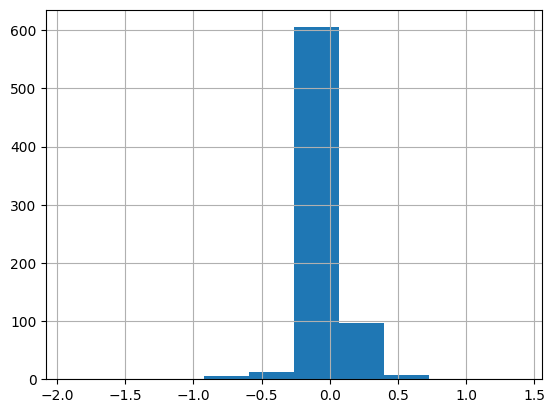

In [ ]:
second_ord_diff_FED.hist()

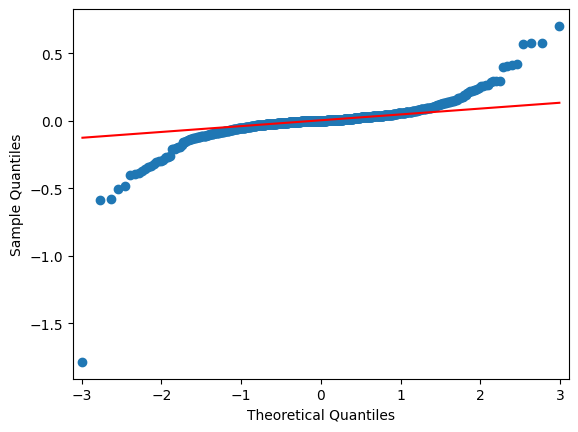

In [ ]:
qqplot(model_FED.resid, line='q');

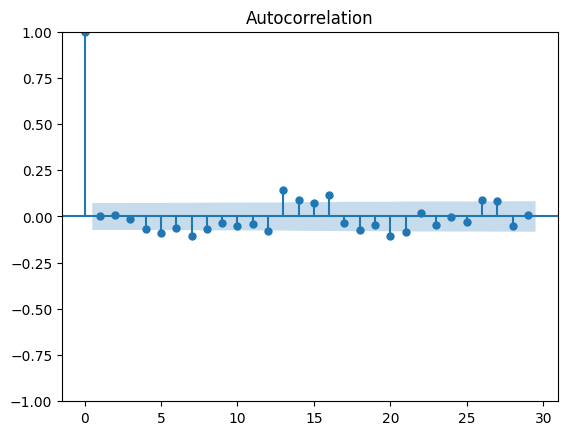

In [ ]:
plot_acf(model_FED.resid)
plt.show()

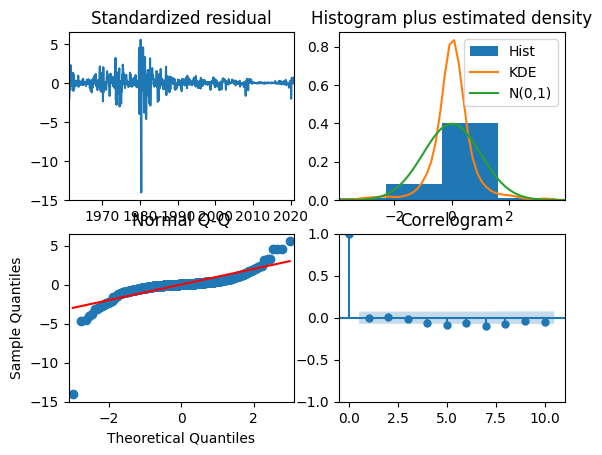

In [ ]:
model_FED.plot_diagnostics()
plt.show()

In [ ]:
model_FED.test_normality()

,0
Jarque-Bera,102644.071456
P-value,0.000000
Skewness,-3.683932
Kurtosis,61.027438


In [ ]:
model_FED.test_heteroskedasticity()

,ARCH-LM,P-value,DF
Lag,,,
1,8.510785,3.530478e-03,1
2,23.791080,6.820757e-06,2
3,23.813834,2.731825e-05,3
4,23.964951,8.117728e-05,4
5,36.277818,8.356969e-07,5
6,55.116945,4.390153e-10,6
7,57.748976,4.241949e-10,7
8,59.228502,6.602859e-10,8
9,60.636308,1.010720e-09,9


In [ ]:
def het_test(model, test=het_breuschpagan):
    lm, lm_pvalue, fvalue, f_pvalue = (
        het_breuschpagan(model.resid,
                         add_constant(
                             model.fittedvalues)
                        ))

    return "Heteroscedastic" if f_pvalue < 0.05 else "Homoscedastic"

het_test(model_FED, test=het_breuschpagan)

'Homoscedastic'

In [ ]:
het_test(model_FED, test=het_white)

'Homoscedastic'

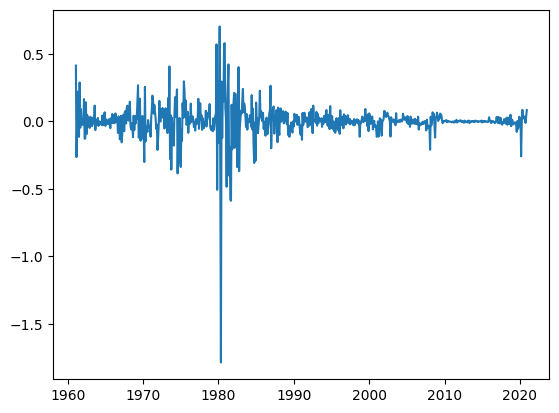

In [ ]:
plt.plot(model_FED.resid[1:])
plt.show()

In [ ]:
xt_FED, lmbda_FED = boxcox(data_sliced['FEDFUNDS'])
print('\nLambda is:', round(lmbda_FED,5))


Lambda is: 0.50413


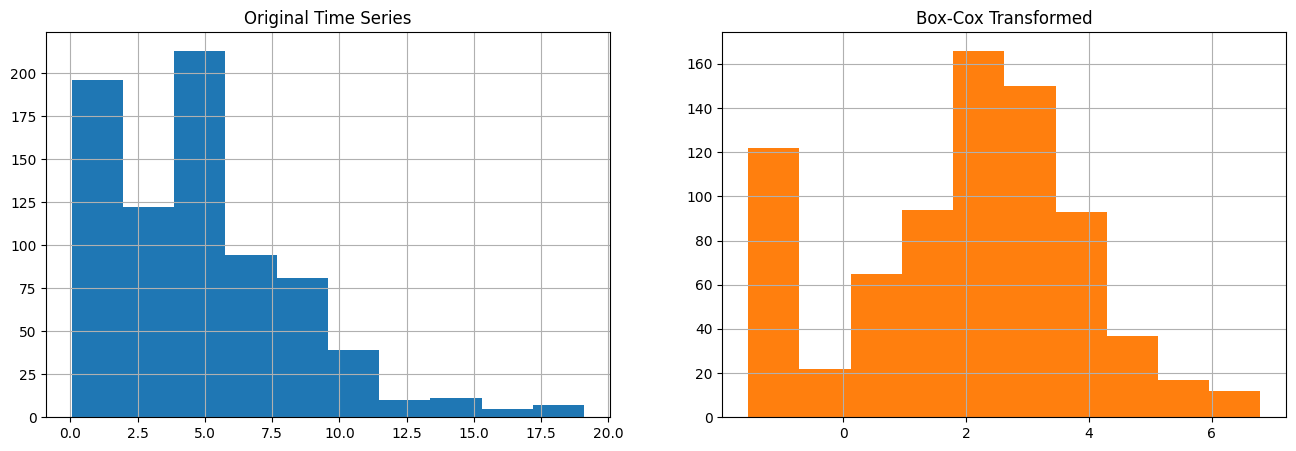

In [ ]:
xts_FED = pd.Series(xt_FED, index=data_sliced['FEDFUNDS'].index)

fig_FED, ax_FED = plt.subplots(1, 2, figsize=(16,5))
data_sliced['FEDFUNDS'].hist(ax=ax_FED[0])
ax_FED[0].set_title('Original Time Series')
xts_FED.hist(ax=ax_FED[1])
ax_FED[1].set_title('Box-Cox Transformed')
xts_FED.hist(ax=ax_FED[1])
ax_FED[1].set_title('Box-Cox Transformed')
plt.show()

In [ ]:
model_bx_FED = AutoReg(xts_FED, lags=10, trend='n').fit()
print(model_bx_FED.diagnostic_summary())

             Test of Normality              
Jarque-Bera    P-value   Skewness   Kurtosis
--------------------------------------------
  13764.310      0.000     -1.312     23.573


    Test of Conditional Homoskedasticity   
       Lag    ARCH-LM    P-value         DF
-------------------------------------------
         1     15.668      0.000          1
         2     32.374      0.000          2
         3     34.586      0.000          3
         4     35.924      0.000          4
         5     43.214      0.000          5
         6     71.358      0.000          6
         7     72.768      0.000          7
         8     75.653      0.000          8
         9     77.029      0.000          9
        10     66.602      0.000         10
-------------------------------------------


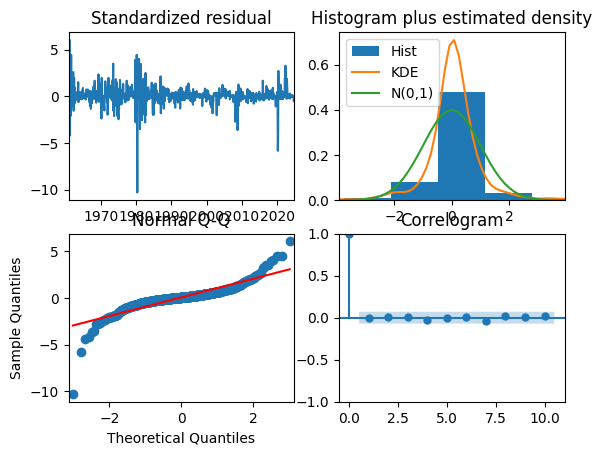

In [ ]:
plot = model_bx_FED.plot_diagnostics()
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

data_diff = data_sliced['FEDFUNDS'].diff().dropna()
acorr_ljungbox(data_diff, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,119.581494,7.811920e-28
2,119.749158,9.926603e-27
3,123.936999,1.095029e-26
4,133.984005,5.472690e-28
5,137.251117,6.868294e-28
6,138.509557,2.067481e-27
7,144.348421,6.231753e-28
8,155.496306,1.396973e-29
9,194.254316,5.296983e-37
10,196.477152,8.756037e-37


#### Comment
Transformation: Second Order Difference

Transformation: Box Cox

Test for Normality demonstrates with a p value inferior to 0.05 that normality is rejected.

Plot diagnostic:
First plot shows a visible pattern indicating possibly autocorrelation. Two point stands out and need to be addressed.
Second plot indicates that the residuals are not normally distributed.
Third plot indicates that it is not normal.
Fourth plot does not show any correlation (no significant spikes).

Autocorrelation:  The p-values are really small which is an indication that we reject the null hypothesis. In other words, there is autocorrelation.
